In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score
from tabulate import tabulate

# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
data=pd.read_csv("dataset.csv")

In [ ]:
reviews = data["Reviews"]
sentiments = data["Sentiment"]

In [ ]:
# Encode sentiments to numerical values
label_encoder = LabelEncoder()
sentiments_encoded = label_encoder.fit_transform(sentiments)
sentiments_encoded

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1])

In [ ]:
# Step 2: Text preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [ ]:
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum() and token not in stop_words]
    return " ".join(filtered_tokens)

reviews_preprocessed = reviews.apply(preprocess_text)
reviews_preprocessed

0     exhilarating nice afford buy shop really feel ...
1     overall affordability product pazhamudhir chol...
2     feel costlier qualitywise price reasonableit c...
3     overall price range medium belive per standard...
4     price depends season aspect affordability ca d...
                            ...                        
95    price high liking prefer store get le discount...
96    price beyond afford often forego purchasing pr...
97    price way beyond afford avoid shopping promoti...
98    store offer great value price making promotion...
99    price reasonable willing pay quality discount ...
Name: Reviews, Length: 100, dtype: object

In [ ]:
# Step 3: TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X = tfidf_vectorizer.fit_transform(reviews_preprocessed)
y = sentiments_encoded

In [ ]:
# Step 4: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

<80x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 4225 stored elements in Compressed Sparse Row format>

In [ ]:
# Step 5: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Step 6: Evaluate the model
y_pred = model.predict(X_test)
y_pred

array([0.59234124, 0.39080781, 0.91885843, 0.42498006, 0.26734297,
       0.51639941, 0.42645369, 0.71369279, 0.74912296, 0.72277   ,
       0.91318883, 0.61343691, 0.66294696, 0.72656705, 0.21204742,
       0.6783604 , 0.9809452 , 1.04278268, 0.60496002, 0.38338488])

In [ ]:
# Since Linear Regression outputs continuous values, we need to threshold the predictions
# For simplicity, we use 0.5 as the threshold for binary classification
y_pred_class = np.round(y_pred).astype(int)

In [ ]:
# Ensure predicted values are within the valid range of class labels
y_pred_class = np.clip(y_pred_class, 0, 1)

accuracy = accuracy_score(y_test, y_pred_class)
print("Accuracy:", accuracy)

Accuracy: 0.75


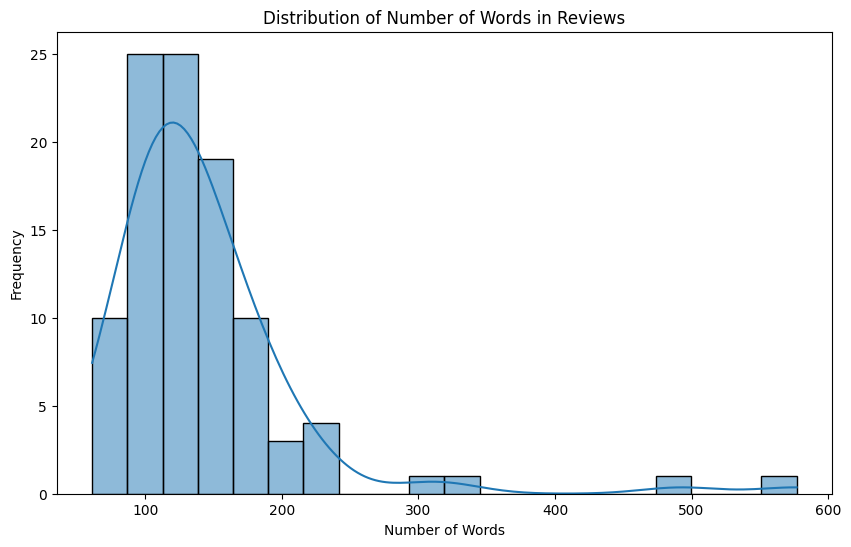

In [ ]:
# Plot the number of words in each review
data['num_words'] = reviews.apply(lambda x: len(word_tokenize(x)))
plt.figure(figsize=(10, 6))
sns.histplot(data['num_words'], bins=20, kde=True)
plt.title('Distribution of Number of Words in Reviews')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

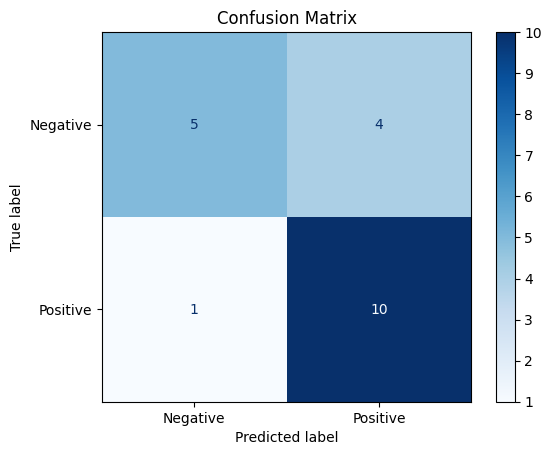

In [ ]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_class)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
cmd.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

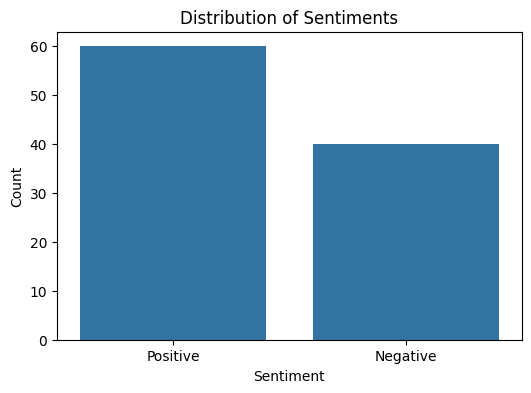

In [ ]:
# Distribution of sentiments
plt.figure(figsize=(6, 4))
sns.countplot(x=sentiments)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

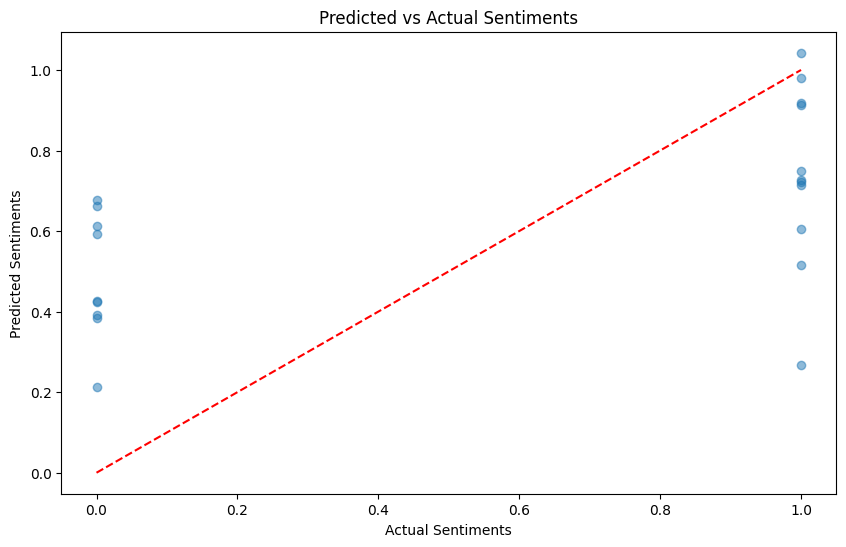

In [ ]:
# Predicted vs Actual Sentiments
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([0, 1], [0, 1], 'r--')  # Identity line
plt.title('Predicted vs Actual Sentiments')
plt.xlabel('Actual Sentiments')
plt.ylabel('Predicted Sentiments')
plt.show()

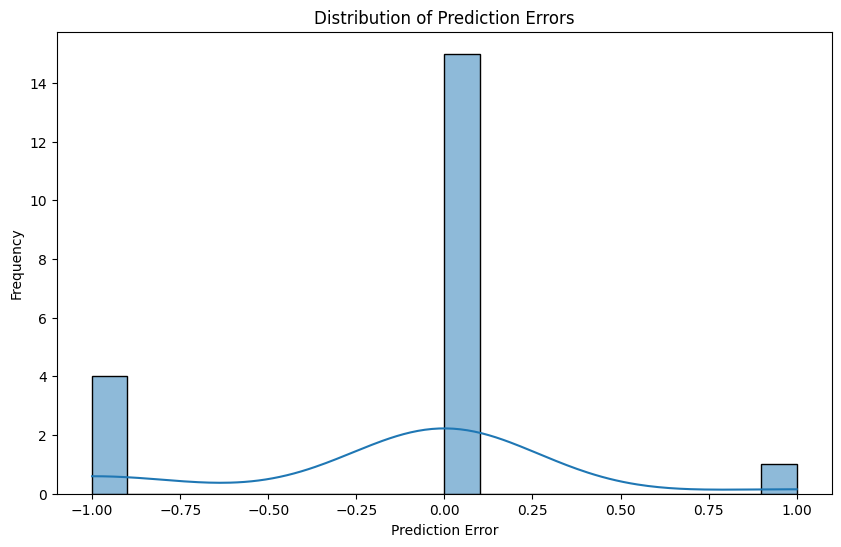

In [ ]:
# Error distribution
errors = y_test - y_pred_class
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=20, kde=True)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Function to preprocess and predict sentiment for a new review
def predict_sentiment(review):
    review_preprocessed = preprocess_text(review)
    review_tfidf = tfidf_vectorizer.transform([review_preprocessed])
    sentiment_pred = model.predict(review_tfidf)
    sentiment_class = np.round(sentiment_pred).astype(int)
    sentiment_class = np.clip(sentiment_class, 0, 1)
    return label_encoder.inverse_transform(sentiment_class)[0]

# Get user input and predict sentiment
user_review = input("Enter a review: ")
predicted_sentiment = predict_sentiment(user_review)
print(f"The predicted sentiment for the review is: {predicted_sentiment}")

KeyboardInterrupt: Interrupted by user

In [ ]:
y_pred_classes = np.round(y_pred).astype(int)

# Calculate F1 score
f1 = f1_score(y_test, y_pred_classes)

# Prepare results for the table
results = [
    ["Linear Regression NLTK", accuracy, f1]
    # Add other models' results here similarly
]

# Print results in table format
print(tabulate(results, headers=["Model", "Accuracy", "F1 Score"], floatfmt=".2f"))

Model                     Accuracy    F1 Score
----------------------  ----------  ----------
Linear Regression NLTK        0.75        0.80
